**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df_test = pd.read_csv('test_lAUu6dG.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Checkpoint

In [4]:
train = df.copy()
test = df_test.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [8]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

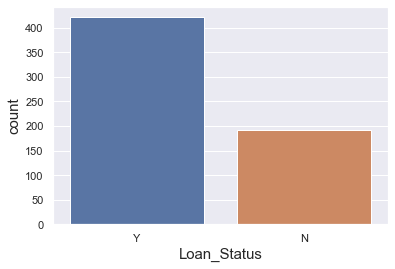

In [9]:
sns.countplot(x = 'Loan_Status', data = train);
#Unbalanced

In [10]:
print(f'Proportion of "N" loan status: {np.round((train.Loan_Status.value_counts(normalize = True)[1]),3)*100} %')
print(f'Proportion of "Y" loan status: {np.round((train.Loan_Status.value_counts(normalize = True)[0]),3)*100} %')

#Clearly unbalanced dataset

Proportion of "N" loan status: 31.3 %
Proportion of "Y" loan status: 68.7 %


In [11]:
train.loc[:, train.dtypes == 'object'].columns.values[1:-1]

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'], dtype=object)

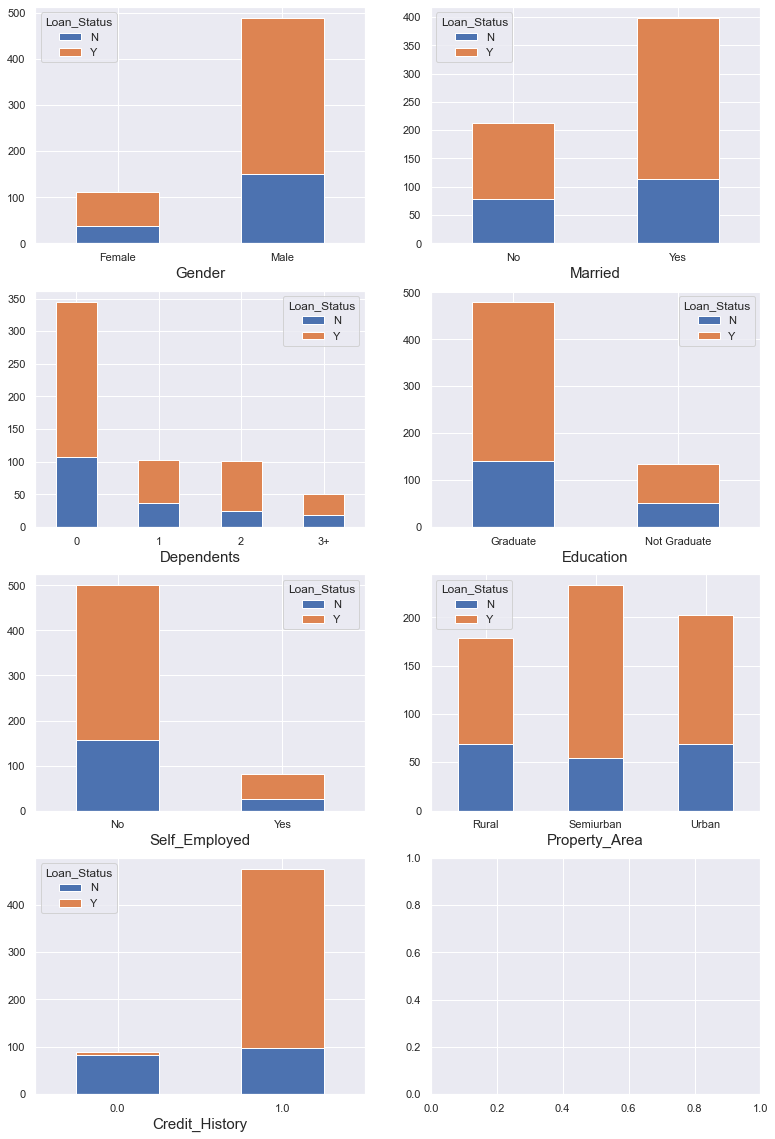

In [12]:
#Plotting for Categorical Variables

fig, axes = plt.subplots(4,2, figsize=(13, 20))

for col, ax in zip(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History'],axes.flatten()):
    pd.crosstab(index = train[col], columns = df['Loan_Status']). \
    plot(kind = 'bar', stacked = True, ax = ax, rot = 0);

From the above plots, It is clear that: 

1) majority of the applicants are male. 

2) Majority of the applicants are married.

3) Most of the applicants dont have dependents.

4) Most of the applicants have graduated from a university.

5) Majority of the applicants are not self-employed.

6) Applicants from semi-urban areas are comparitevely higher than urban and rural areas.

7) Majority of the applicants have repaid their debts. But those applicants who haven't repaid their debts has got their loan application rejected.

In [13]:
# Numerical Variables.
train.loc[:, train.dtypes != 'object'].columns.values[:-2]

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype=object)

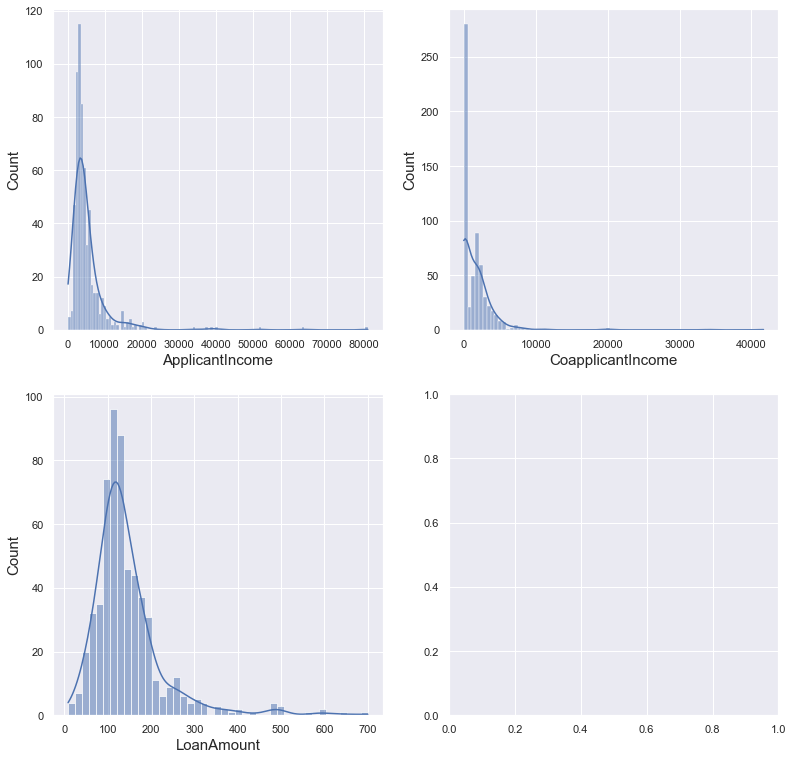

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

for col, ax in zip(train.loc[:, train.dtypes != 'object'].columns.values[:-2], axes.flatten()):
    sns.histplot(train[col], kde=True, ax = ax);

In [15]:
#Viewing the descriptive statistics of numerical variables.

train.loc[:, train.dtypes != 'object'].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


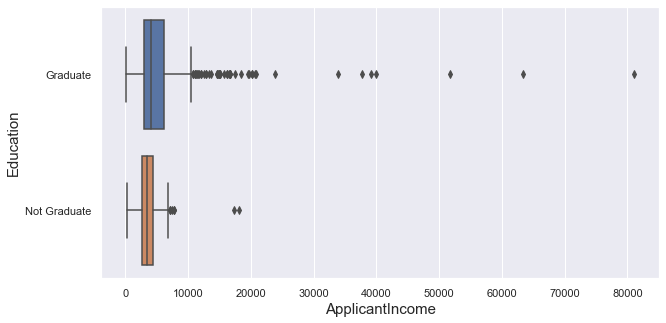

In [16]:
#Lets check the income levels based on education
plt.figure(figsize = (10,5))
sns.boxplot(x = 'ApplicantIncome', y = 'Education', data = train);

#Graduated applicants have a wider range of income levels compared to not graduated applicants. The median
#salary of a graduate is higher than that of non-graduate.

Lets check some of the numerical variables against loan Status

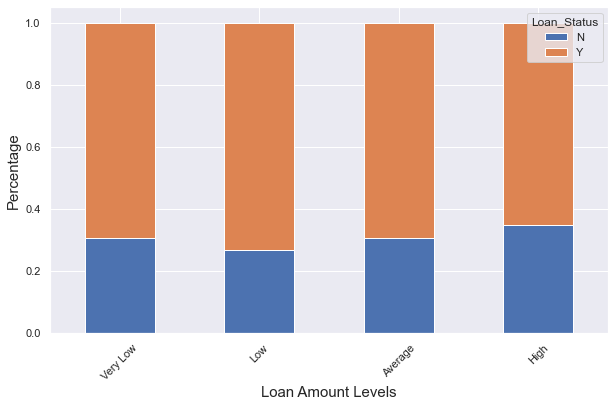

In [17]:
#Loan amounts

bins = [0,100, 130, 170, 700] #Keeping same bins as main applicants incomes
groups = ['Very Low', 'Low', 'Average', 'High']
train['Loan_amt_bin'] = pd.cut(x = train['LoanAmount'], bins = bins, labels = groups)

Loan_amt_bin = pd.crosstab(index = train.Loan_amt_bin, columns = train['Loan_Status'])
Loan_amt_bin.div(Loan_amt_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Loan Amount Levels")
plt.ylabel('Percentage')
plt.xticks(rotation=45) ;

#Although most of the loan amount levels have almost equal proportions of approved and not approved status,
# higher loan amounts tend to have higher chances of loans not getting approved.

In [18]:
#In terms of applicant income.

#Binning

bins = [0,2800, 3800, 5800, 81000]
groups = ['Low', 'Middle', 'Upper-Middle', 'High']
train['Income_bin'] = pd.cut(x = train['ApplicantIncome'], bins = bins, labels = groups)

Income_bin = pd.crosstab(index = train.Income_bin, columns = train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,47,102
Middle,49,108
Upper-Middle,47,108
High,49,104


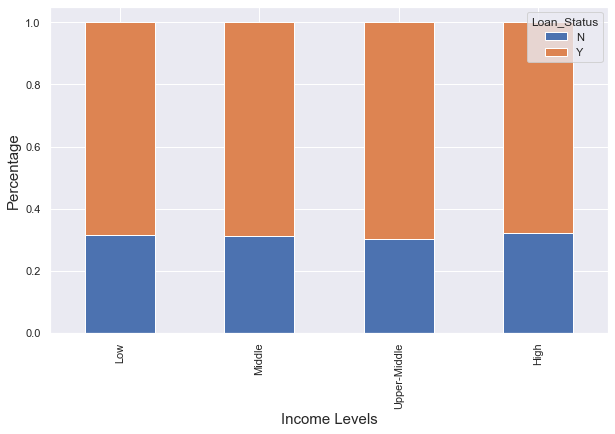

In [19]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel('Income Levels')
plt.ylabel('Percentage');

#It's clear that income levels does not affect the chances of loan being approved or not.

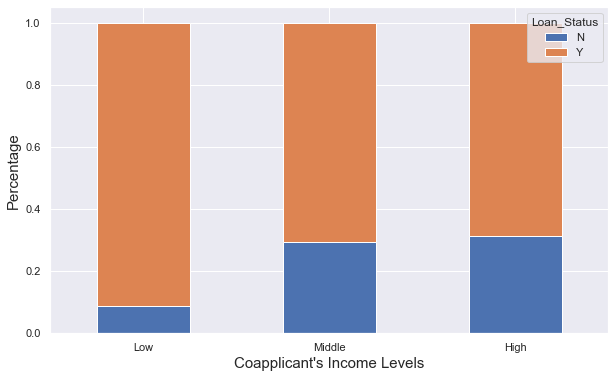

In [20]:
#Checking for co-applicant income

bins = [0,1200, 2300, 42000]
groups = ['Low', 'Middle', 'High']
train['Co_app_Income_bin'] = pd.cut(x = train['CoapplicantIncome'], bins = bins, labels = groups)

Coapp_Income_bin = pd.crosstab(index = train.Co_app_Income_bin, columns = train['Loan_Status'])
Coapp_Income_bin.div(Coapp_Income_bin.sum(1), axis = 0).\
plot(kind = 'bar', stacked = True, figsize = (10,6), rot = 0)
plt.xlabel("Coapplicant's Income Levels")
plt.ylabel('Percentage');

#Here we can clearly see that if the coapplicant salary is low, there is a higher chance the loan will
#get approved.

### Feature Engineering & Data Preprocessing

Let's create some extra features from the variables. But first, we have to impute the train data set in order to ensure no missing wales exist.

##### Handling Missing Values

In [21]:
train.isnull().sum()

#Gender, MArried, dependents, self_employed and loan amount, loan amount term and credit history 
#have missing values.

#Out of these, Gender, Married, dependents, self_employed and credit history are categorical variables.

#HEnce we will replace missing value of categorical vriables with their mode.

#Varibales with bins will be removed later. Hence, no imputation is done.

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [22]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Imputing Loan Amount term

In [23]:
train[train.Loan_Amount_Term.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_amt_bin,Income_bin,Co_app_Income_bin
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,Low,Low,High
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,Very Low,Low,Middle
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,Very Low,Upper-Middle,NaN
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,Very Low,Middle,NaN
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,Very Low,Upper-Middle,NaN
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,Average,Middle,High
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,High,Middle,High
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,Low,Low,High
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,High,High,Low
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,Low,Middle,High


In [24]:
train.Loan_Amount_Term.value_counts()

#For loan amount terms, we can see 360 is the most repeating term compared to others.

#We can replace this with its mode too.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
import time

t0 = time.time() #To measure how long it takes for this algorithm to run

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [26]:
train.loc[:,['Gender', 'Married', 'Dependents', 
             'Self_Employed', 'Credit_History', 
             'Loan_Amount_Term']] = imputer.fit_transform(train.loc[:,['Gender', 'Married','Dependents',
                                                                       'Self_Employed','Credit_History',
                                                                       'Loan_Amount_Term']])
#Doing the same for test dataset

test.loc[:,['Gender', 'Married', 'Dependents','Self_Employed', 'Credit_History', 
             'Loan_Amount_Term']] = imputer.transform(test.loc[:,['Gender', 'Married', 'Dependents',
                                                                  'Self_Employed', 'Credit_History',
                                                                  'Loan_Amount_Term']])

print('Simple Imputer (Most Frequent) Time Elapsed:', time.time()-t0)

Simple Imputer (Most Frequent) Time Elapsed: 0.5250880718231201


In [27]:
train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [28]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

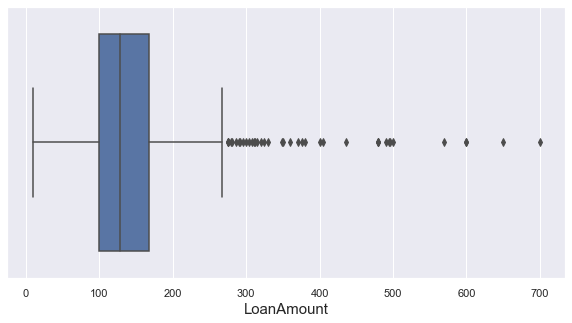

In [29]:
#Loan Amount: Since the distribution of Loan amount is right skewed, its missing values will be imputed 
#with its median

plt.figure(figsize = (10,5))
sns.boxplot(x = 'LoanAmount', data = train);

In [30]:
imputer = SimpleImputer(strategy='median')

train[['LoanAmount']] = imputer.fit_transform(train[['LoanAmount']])
test[['LoanAmount']] = imputer.transform(test[['LoanAmount']])

In [31]:
train.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Loan_amt_bin          22
Income_bin             0
Co_app_Income_bin    273
dtype: int64

In [32]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64


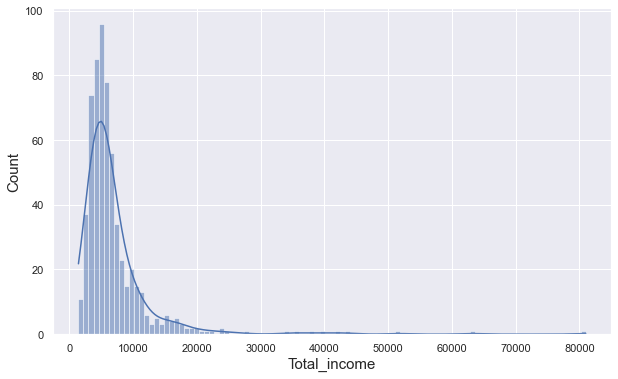

In [33]:
#Now, lets check whether combining both applicant and co-applicant incomes have an impact on loan getting
#approved or now.

train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

#Same for test set
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

print(train['Total_income'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['Total_income'],kde = True);

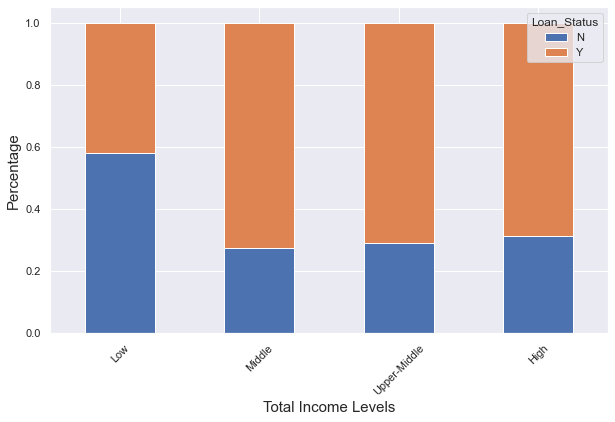

In [34]:
#Binning total income

bins = [0,2800, 3800, 5800, 81000] #Keeping same bins as main applicants incomes
groups = ['Low', 'Middle', 'Upper-Middle', 'High']
train['Total_Income_bin'] = pd.cut(x = train['Total_income'], bins = bins, labels = groups)

Total_income_bin = pd.crosstab(index = train.Total_Income_bin, columns = train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Total Income Levels")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#Here, applicants within the low total income range are more likely to get their loans not approved.

count     614.000000
mean      473.687083
std       511.134356
min        25.000000
25%       288.888889
50%       361.111111
75%       505.555556
max      9250.000000
Name: EMI, dtype: float64


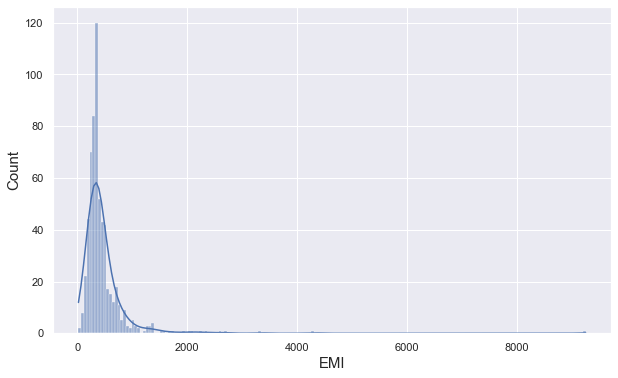

In [35]:
#Creating EMI variable.

#EMI is the loan amount applicant has to pay per month.

train['EMI'] = (train['LoanAmount']*1000)/train['Loan_Amount_Term']

#Same for test set
test['EMI'] = (test['LoanAmount']*1000)/test['Loan_Amount_Term']

print(train['EMI'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['EMI'],kde = True);

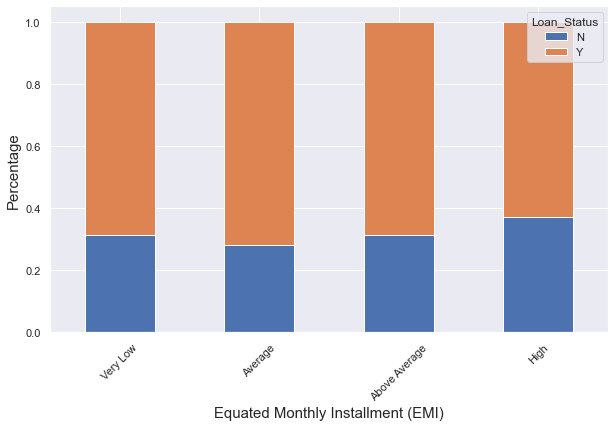

In [36]:
#Checking for EMI's effect on loan status

bins = [0,300, 400, 600, 9250] #Keeping same bins as main applicants incomes
groups = ['Very Low', 'Average', 'Above Average', 'High']
train['EMI_bin'] = pd.cut(x = train['EMI'], bins = bins, labels = groups)

EMI_bin = pd.crosstab(index = train.EMI_bin, columns = train['Loan_Status'])
EMI_bin.div(EMI_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.xlabel("Equated Monthly Installment (EMI)")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#No significant effect is found on the loan Status

count      614.000000
mean      6551.017998
std       6290.136695
min      -1768.000000
25%       3804.305556
50%       4979.888889
75%       6958.027778
max      80000.000000
Name: Balance_income, dtype: float64


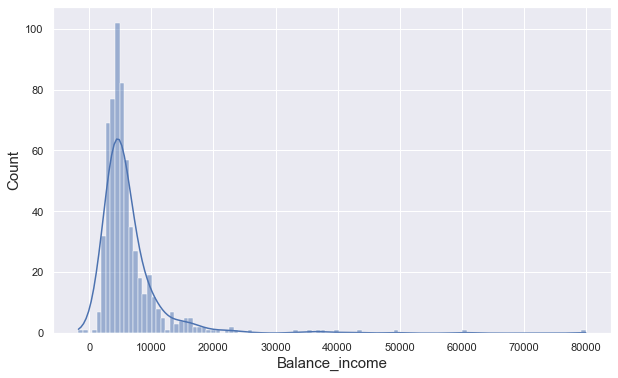

In [37]:
#Creating Balance Income variable.

#Balance Income is the remaning amount left after applicant pays EMI.

train['Balance_income'] = train['Total_income'] - train['EMI']

#Same for test set
test['Balance_income'] = test['Total_income'] - test['EMI']

print(train['Balance_income'].describe())
plt.figure(figsize = (10,6))
sns.histplot(train['Balance_income'],kde = True);

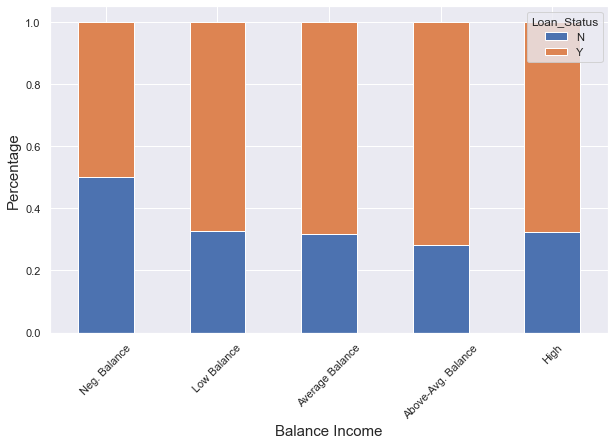

In [38]:
#Checking for EMI's effect on loan status

bins = [-2000,0,4000, 5000, 7000, 80000] #Keeping same bins as main applicants incomes
groups = ['Neg. Balance', 'Low Balance', 'Average Balance', 'Above-Avg. Balance', 'High']
train['Balance_income_bin'] = pd.cut(x = train['Balance_income'], bins = bins, labels = groups)

Balance_income_bin = pd.crosstab(index = train.Balance_income_bin, columns = train['Loan_Status'])
Balance_income_bin.div(Balance_income_bin.sum(1), axis = 0).plot(kind = 'bar', 
                                                                 stacked = True, figsize = (10,6))
plt.xlabel("Balance Income")
plt.ylabel('Percentage')
plt.xticks(rotation=45);

#Applicants with the potential to have negative balance after paying EMI are more liekly to get their 
#loan applications rejected.

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Loan_ID             614 non-null    object  
 1   Gender              614 non-null    object  
 2   Married             614 non-null    object  
 3   Dependents          614 non-null    object  
 4   Education           614 non-null    object  
 5   Self_Employed       614 non-null    object  
 6   ApplicantIncome     614 non-null    int64   
 7   CoapplicantIncome   614 non-null    float64 
 8   LoanAmount          614 non-null    float64 
 9   Loan_Amount_Term    614 non-null    float64 
 10  Credit_History      614 non-null    float64 
 11  Property_Area       614 non-null    object  
 12  Loan_Status         614 non-null    object  
 13  Loan_amt_bin        592 non-null    category
 14  Income_bin          614 non-null    category
 15  Co_app_Income_bin   341 non-null    cate

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Total_income       367 non-null    int64  
 13  EMI                367 non-null    float64
 14  Balance_income     367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [41]:
#Removing unecessary variables

train.drop(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                 'Loan_Amount_Term', 'Loan_amt_bin', 
                 'Income_bin', 'Co_app_Income_bin', 'Total_Income_bin', 
                 'EMI_bin', 'Balance_income_bin']], axis = 1, inplace = True)

#Dropping varibales from testset
test.drop(test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount',
                'Loan_Amount_Term']], axis = 1, inplace = True)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         614 non-null    object 
 1   Gender          614 non-null    object 
 2   Married         614 non-null    object 
 3   Dependents      614 non-null    object 
 4   Education       614 non-null    object 
 5   Self_Employed   614 non-null    object 
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    object 
 8   Loan_Status     614 non-null    object 
 9   Total_income    614 non-null    float64
 10  EMI             614 non-null    float64
 11  Balance_income  614 non-null    float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         367 non-null    object 
 1   Gender          367 non-null    object 
 2   Married         367 non-null    object 
 3   Dependents      367 non-null    object 
 4   Education       367 non-null    object 
 5   Self_Employed   367 non-null    object 
 6   Credit_History  367 non-null    float64
 7   Property_Area   367 non-null    object 
 8   Total_income    367 non-null    int64  
 9   EMI             367 non-null    float64
 10  Balance_income  367 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 31.7+ KB


In [44]:
#Converting loan status to 1 and 0

train['Loan_Status'] = np.where(train['Loan_Status'] == 'N',0,1).astype('int64')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         614 non-null    object 
 1   Gender          614 non-null    object 
 2   Married         614 non-null    object 
 3   Dependents      614 non-null    object 
 4   Education       614 non-null    object 
 5   Self_Employed   614 non-null    object 
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    object 
 8   Loan_Status     614 non-null    int64  
 9   Total_income    614 non-null    float64
 10  EMI             614 non-null    float64
 11  Balance_income  614 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [46]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [47]:
#Here, I will map Dependents to 1 representing yes and 0, representing no.

train['Dependents'] = np.where(train['Dependents'] != '0', 1,0)
test['Dependents'] = np.where(test['Dependents'] != '0', 1,0)

In [48]:
#Similarly for married, 1 for yes, 0 for no

train['Married'] = np.where(train['Married'] == 'Yes', 1,0)
test['Married'] = np.where(test['Married'] == 'Yes', 1,0)

In [49]:
#Similarly for married, 1 for yes, 0 for no

train['Self_Employed'] = np.where(train['Self_Employed'] == 'Yes', 1,0)
test['Self_Employed'] = np.where(test['Self_Employed'] == 'Yes', 1,0)

In [50]:
train.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
Total_income      0
EMI               0
Balance_income    0
dtype: int64

In [51]:
test.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Total_income      0
EMI               0
Balance_income    0
dtype: int64

##### Outliers

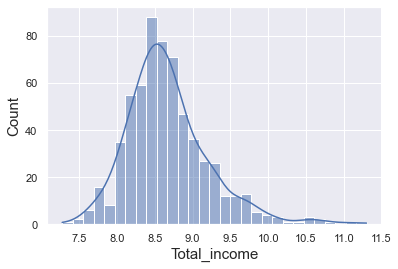

In [52]:
# Taking the log transformation of the total income will transform it to nealy normal distribution

sns.histplot(np.log(train.Total_income), kde = True);

In [53]:
train['Total_Income_log'] = np.log(train.Total_income)

#for testset
test['Total_Income_log'] = np.log(test.Total_income)

In [54]:
train.Total_Income_log.describe() #Mean and median are nearly equal

count    614.000000
mean       8.669414
std        0.545102
min        7.273786
25%        8.334712
50%        8.597205
75%        8.925549
max       11.302204
Name: Total_Income_log, dtype: float64

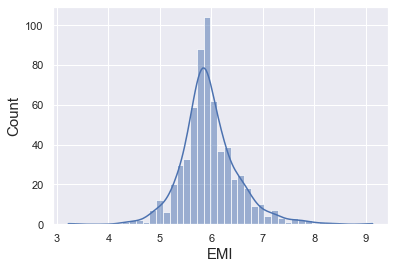

In [55]:
#Similarly for EMI
sns.histplot(np.log(train.EMI), kde = True);

In [56]:
train['EMI_log'] = np.log(train.EMI)

#For testset
test['EMI_log'] = np.log(test.EMI)

train.EMI_log.describe()

count    614.000000
mean       5.961771
std        0.563833
min        3.218876
25%        5.666042
50%        5.889186
75%        6.225658
max        9.132379
Name: EMI_log, dtype: float64

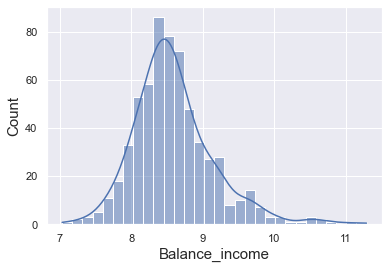

In [57]:
#Similarly for Balance Income
sns.histplot(np.log(train.Balance_income), kde = True);

In [58]:
train['Balance_income_log'] = np.log(train.Balance_income)

#For testset
test['Balance_income_log'] = np.log(test.Balance_income)

train.Balance_income_log.describe()

count    612.000000
mean       8.591961
std        0.562197
min        7.035073
25%        8.244830
50%        8.516048
75%        8.851149
max       11.289782
Name: Balance_income_log, dtype: float64

In [59]:
#There are NaN in Log of Balance incomes

print(train['Balance_income_log'].isna().sum())
print(test['Balance_income_log'].isna().sum())

2
2


In [60]:
train['Balance_income_log'] = train['Balance_income_log'].fillna(0)
test['Balance_income_log'] = test['Balance_income_log'].fillna(0)
print(train['Balance_income_log'].isna().sum())
print(test['Balance_income_log'].isna().sum())

0
0


In [61]:
#Dropping variables

train.drop(train[['Total_income', 'EMI', 'Balance_income']], axis = 1, inplace = True)
test.drop(test[['Total_income', 'EMI', 'Balance_income']], axis = 1, inplace = True)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    int32  
 3   Dependents          614 non-null    int32  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    int32  
 6   Credit_History      614 non-null    float64
 7   Property_Area       614 non-null    object 
 8   Loan_Status         614 non-null    int64  
 9   Total_Income_log    614 non-null    float64
 10  EMI_log             614 non-null    float64
 11  Balance_income_log  614 non-null    float64
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 50.5+ KB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Gender              367 non-null    object 
 2   Married             367 non-null    int32  
 3   Dependents          367 non-null    int32  
 4   Education           367 non-null    object 
 5   Self_Employed       367 non-null    int32  
 6   Credit_History      367 non-null    float64
 7   Property_Area       367 non-null    object 
 8   Total_Income_log    367 non-null    float64
 9   EMI_log             367 non-null    float64
 10  Balance_income_log  367 non-null    float64
dtypes: float64(4), int32(3), object(4)
memory usage: 27.4+ KB


In [64]:
#Education Feature is an ordinal veriable where Graduated has ahigher rank than not graduated.
#Therefore, this feature needs to be turned into an ordinal variable.

train['Education'] = pd.Categorical(train['Education'], categories=['Not Graduate','Graduate'], 
                                    ordered = True)
test['Education'] = pd.Categorical(test['Education'], categories=['Not Graduate','Graduate'], 
                                    ordered = True)

In [65]:
train['Education']

0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: category
Categories (2, object): ['Not Graduate' < 'Graduate']

In [66]:
#ENcoding Education with number

train['Education'] = pd.factorize(train['Education'], sort = True)[0]
test['Education'] = pd.factorize(test['Education'], sort = True)[0]

In [67]:
#Temporarily creating dummy variable for Gender and uban property

for col in ['Gender', 'Property_Area']:
    dummy_col = pd.get_dummies(train[col])
    train = pd.concat([train, dummy_col], axis = 1)

In [68]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI_log,Balance_income_log,Female,Male,Rural,Semiurban,Urban
0,LP001002,Male,0,0,1,0,1.0,Urban,1,8.674026,5.873682,8.611311,0,1,0,0,1
1,LP001003,Male,1,1,1,0,1.0,Rural,0,8.714568,5.873682,8.654421,0,1,1,0,0
2,LP001005,Male,1,0,1,1,1.0,Urban,1,8.006368,5.211306,7.943309,0,1,0,0,1
3,LP001006,Male,1,0,0,0,1.0,Urban,1,8.505323,5.809143,8.435477,0,1,0,0,1
4,LP001008,Male,0,0,1,0,1.0,Urban,1,8.699515,5.970411,8.632009,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,1,0,1.0,Rural,1,7.972466,5.284331,7.902035,1,0,1,0,0
610,LP002979,Male,1,1,1,0,1.0,Rural,1,8.320205,5.403678,8.264564,0,1,1,0,0
611,LP002983,Male,1,1,1,0,1.0,Urban,1,9.025456,6.555041,8.937116,0,1,0,0,1
612,LP002984,Male,1,1,1,0,1.0,Urban,1,8.933664,6.252760,8.862704,0,1,0,0,1


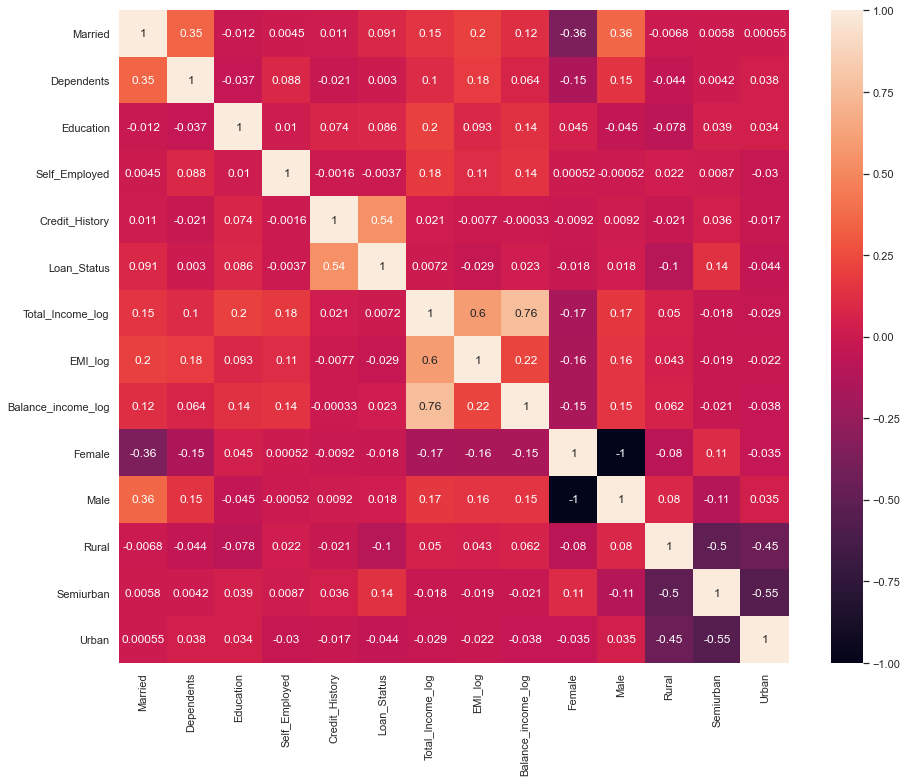

In [69]:
plt.figure(figsize = (15,12))
sns.heatmap(train.corr(), annot = True,annot_kws={'size': 12});

### Model Building

In [70]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI_log,Balance_income_log,Female,Male,Rural,Semiurban,Urban
0,LP001002,Male,0,0,1,0,1.0,Urban,1,8.674026,5.873682,8.611311,0,1,0,0,1
1,LP001003,Male,1,1,1,0,1.0,Rural,0,8.714568,5.873682,8.654421,0,1,1,0,0
2,LP001005,Male,1,0,1,1,1.0,Urban,1,8.006368,5.211306,7.943309,0,1,0,0,1
3,LP001006,Male,1,0,0,0,1.0,Urban,1,8.505323,5.809143,8.435477,0,1,0,0,1
4,LP001008,Male,0,0,1,0,1.0,Urban,1,8.699515,5.970411,8.632009,0,1,0,0,1


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    int32  
 3   Dependents          614 non-null    int32  
 4   Education           614 non-null    int64  
 5   Self_Employed       614 non-null    int32  
 6   Credit_History      614 non-null    float64
 7   Property_Area       614 non-null    object 
 8   Loan_Status         614 non-null    int64  
 9   Total_Income_log    614 non-null    float64
 10  EMI_log             614 non-null    float64
 11  Balance_income_log  614 non-null    float64
 12  Female              614 non-null    uint8  
 13  Male                614 non-null    uint8  
 14  Rural               614 non-null    uint8  
 15  Semiurban           614 non-null    uint8  
 16  Urban   

In [72]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income_log', 'EMI_log', 'Balance_income_log', 'Female', 'Male',
       'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [73]:
X = train.drop(['Loan_ID', 'Loan_Status', 'Female', 'Male','Rural', 'Semiurban', 'Urban'], axis = 1).values
y = train.Loan_Status.values

In [74]:
np.set_printoptions(threshold=np.inf)

print(X)
print()
print(y)

[['Male' 0 0 1 0 1.0 'Urban' 8.674025985443025 5.873681511451599
  8.611310741128015]
 ['Male' 1 1 1 0 1.0 'Rural' 8.714567550836485 5.873681511451599
  8.654420523412435]
 ['Male' 1 0 1 1 1.0 'Urban' 8.006367567650246 5.211305989558407
  7.94330943168311]
 ['Male' 1 0 0 0 1.0 'Urban' 8.50532301884575 5.809142990314028
  8.435476861796248]
 ['Male' 0 0 1 0 1.0 'Urban' 8.699514748210191 5.970411137910149
  8.632008865844819]
 ['Male' 1 1 1 1 1.0 'Urban' 9.170871628065816 6.608899905932231
  9.090580383435578]
 ['Male' 1 0 0 0 1.0 'Urban' 8.255568653283746 5.575528139132523
  8.18454474588987]
 ['Male' 1 1 1 0 0.0 'Semiurban' 8.61974977974133 6.084246280558948
  8.537213659907048]
 ['Male' 1 1 1 0 1.0 'Urban' 8.61830469278465 6.145615226935241
  8.530175225639406]
 ['Male' 1 1 1 0 1.0 'Semiurban' 10.077818939438902 6.876723169734409
  10.036249204541894]
 ['Male' 1 1 1 0 1.0 'Urban' 8.268731832117737 5.27014648958134
  8.21758847400755]
 ['Male' 1 1 1 0 1.0 'Urban' 8.375629627094451 5.71

In [75]:
X[:,[0,6]]

array([['Male', 'Urban'],
       ['Male', 'Rural'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Semiurban'],
       ['Male', 'Urban'],
       ['Male', 'Semiurban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Rural'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Female', 'Urban'],
       ['Male', 'Rural'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Semiurban'],
       ['Male', 'Rural'],
       ['Male', 'Semiurban'],
       ['Male', 'Semiurban'],
       ['Male', 'Semiurban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Female', 'Semiurban'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
       ['Male', 'Rural'],
       ['Male', 'Semiurban'],
       ['Male', 'Rural'],
       ['Male', 'Urban'],
       ['Male', 'Urban'],
  

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [77]:
test_df = test.copy()

In [78]:
test_df = test_df.iloc[:,1:].values

In [79]:
print(X.shape)
print(test_df.shape)

(614, 10)
(367, 10)


In [80]:
#Onehotencoding property area
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,6])], remainder='passthrough')
X = ct.fit_transform(X)
test_df = ct.transform(test_df)
print(X)

[[0.0 1.0 0.0 0.0 1.0 0 0 1 0 1.0 8.674025985443025 5.873681511451599
  8.611310741128015]
 [0.0 1.0 1.0 0.0 0.0 1 1 1 0 1.0 8.714567550836485 5.873681511451599
  8.654420523412435]
 [0.0 1.0 0.0 0.0 1.0 1 0 1 1 1.0 8.006367567650246 5.211305989558407
  7.94330943168311]
 [0.0 1.0 0.0 0.0 1.0 1 0 0 0 1.0 8.50532301884575 5.809142990314028
  8.435476861796248]
 [0.0 1.0 0.0 0.0 1.0 0 0 1 0 1.0 8.699514748210191 5.970411137910149
  8.632008865844819]
 [0.0 1.0 0.0 0.0 1.0 1 1 1 1 1.0 9.170871628065816 6.608899905932231
  9.090580383435578]
 [0.0 1.0 0.0 0.0 1.0 1 0 0 0 1.0 8.255568653283746 5.575528139132523
  8.18454474588987]
 [0.0 1.0 0.0 1.0 0.0 1 1 1 0 0.0 8.61974977974133 6.084246280558948
  8.537213659907048]
 [0.0 1.0 0.0 0.0 1.0 1 1 1 0 1.0 8.61830469278465 6.145615226935241
  8.530175225639406]
 [0.0 1.0 0.0 1.0 0.0 1 1 1 0 1.0 10.077818939438902 6.876723169734409
  10.036249204541894]
 [0.0 1.0 0.0 0.0 1.0 1 1 1 0 1.0 8.268731832117737 5.27014648958134
  8.21758847400755]
 [0.

In [81]:
ct.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_Rural',
 'encoder__x1_Semiurban',
 'encoder__x1_Urban',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x7',
 'x8',
 'x9']

# Train Test Split

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=157)

In [83]:
#for Scaled

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
test_df_scaled = test_df.copy()

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled[:,[10,11,12]] = sc.fit_transform(X_train_scaled[:,[10,11,12]])
X_test_scaled[:,[10,11,12]] = sc.transform(X_test_scaled[:,[10,11,12]])
test_df_scaled[:,[10,11,12]] = sc.transform(test_df_scaled[:,[10,11,12]])

# Model Training

In [85]:
#Cross-Validation using classic classification models.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    LogisticRegression(),
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB()
]

model_names = ('Logistic', 'Linear_SVC', 'Kernal_SVC', 'KNN', 'Naive_Bayes')

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=5, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(models, model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train_scaled,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
    highlight_max(color = 'green', axis = 0)

Logistic

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 80.61224489795919 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 80.61224489795919 %
5 of kfold 5
Accuracy: 82.6530612244898 %

Mean Accuracy of Logistic: 80.853 %

Linear_SVC

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 80.61224489795919 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 80.61224489795919 %
5 of kfold 5
Accuracy: 83.6734693877551 %

Mean Accuracy of Linear_SVC: 81.058 %

Kernal_SVC

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 79.59183673469387 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 77.55102040816327 %
5 of kfold 5
Accuracy: 81.63265306122449 %

Mean Accuracy of Kernal_SVC: 79.833 %

KNN

1 of kfold 5
Accuracy: 75.75757575757575 %
2 of kfold 5
Accuracy: 69.38775510204081 %
3 of kfold 5
Accuracy: 69.38775510204081 %
4 of kfold 5
Accuracy: 69.38775510204081 %
5 of kfold 5
Accuracy: 76.53

,Models,Accuracy %,Accuracy STD%
1,Linear_SVC,81.058000,1.673000
0,Logistic,80.853000,1.378000
2,Kernal_SVC,79.833000,1.676000
4,Naive_Bayes,79.833000,2.014000
3,KNN,72.090000,3.319000


In [86]:
#Using Ensemble Models
#For these models, standardization are not needed.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree_model_names = ['Decision_tree', 'Random_forest', 'XGBOOST', 'CATBOOST', 'LightGB', 'AdaBOOST', 
                    'Gradient_Boosting_Classifier']

tree_models = [
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy'), 
    XGBClassifier(use_label_encoder=False, eval_metric = 'error'), 
    CatBoostClassifier(verbose = False), 
    LGBMClassifier(), 
    AdaBoostClassifier(), 
    GradientBoostingClassifier()
]

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=5, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(tree_models,tree_model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':tree_model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
highlight_max(color = 'green', axis = 0)

Decision_tree

1 of kfold 5
Accuracy: 67.67676767676768 %
2 of kfold 5
Accuracy: 70.40816326530613 %
3 of kfold 5
Accuracy: 69.38775510204081 %
4 of kfold 5
Accuracy: 74.48979591836735 %
5 of kfold 5
Accuracy: 74.48979591836735 %

Mean Accuracy of Decision_tree: 71.29 %

Random_forest

1 of kfold 5
Accuracy: 77.77777777777779 %
2 of kfold 5
Accuracy: 78.57142857142857 %
3 of kfold 5
Accuracy: 76.53061224489795 %
4 of kfold 5
Accuracy: 77.55102040816327 %
5 of kfold 5
Accuracy: 81.63265306122449 %

Mean Accuracy of Random_forest: 78.413 %

XGBOOST

1 of kfold 5
Accuracy: 75.75757575757575 %
2 of kfold 5
Accuracy: 77.55102040816327 %
3 of kfold 5
Accuracy: 74.48979591836735 %
4 of kfold 5
Accuracy: 77.55102040816327 %
5 of kfold 5
Accuracy: 75.51020408163265 %

Mean Accuracy of XGBOOST: 76.172 %

CATBOOST

1 of kfold 5
Accuracy: 78.78787878787878 %
2 of kfold 5
Accuracy: 80.61224489795919 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 78.57142857142857 %
5 of kfold 5

,Models,Accuracy %,Accuracy STD%
3,CATBOOST,80.247000,2.352000
5,AdaBOOST,79.221000,2.331000
1,Random_forest,78.413000,1.737000
6,Gradient_Boosting_Classifier,77.392000,2.278000
2,XGBOOST,76.172000,1.204000
4,LightGB,76.166000,2.338000
0,Decision_tree,71.290000,2.754000


**Support Vector Machine and CATBOOST are the chosen algorithms**

### Hyperparameter Tuning

###### Tuning SVM

In [87]:
#KERNAL SVC

#Using Randomized search first, to narrow the parameter settings.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'C': np.arange(0.05,1.05,0.05), 'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 
          'probability': [True], 'class_weight': [None, 'balanced']}, 
          {'C': np.arange(0.05,1.05,0.05), 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'], 
           'coef0': [0.0, 0.01, 0.1, 0.2], 'probability': [True], 'class_weight': [None, 'balanced']},
          {'C': np.arange(0.05,1.05,0.05), 'kernel': ['linear'], 'probability': [True], 
          'class_weight': [None, 'balanced']}]

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

grid_search = RandomizedSearchCV(estimator = SVC(), 
                           param_distributions = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

tuning = 1

while tuning <=5:
    grid_search.fit(X_train_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning += 1

tuning: 1
Best Accuracy: 80.86122448979593 %
Best Parameters: {'probability': True, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.1, 'class_weight': None, 'C': 0.55}

tuning: 2
Best Accuracy: 81.06938775510203 %
Best Parameters: {'probability': True, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 0.6000000000000001}

tuning: 3
Best Accuracy: 81.46938775510205 %
Best Parameters: {'probability': True, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.01, 'class_weight': None, 'C': 0.45}

tuning: 4
Best Accuracy: 81.2734693877551 %
Best Parameters: {'probability': True, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.0, 'class_weight': 'balanced', 'C': 0.25}

tuning: 5
Best Accuracy: 80.66122448979594 %
Best Parameters: {'probability': True, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 0.5}



tuning: 1

Best Accuracy: 82.08571428571429 %

Best Parameters: {'probability': True, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.0, 'class_weight': None, 'C': 0.3}

In [88]:
#KERNAL SVC

#Using Randomized search first, to narrow the parameter settings.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'C': np.arange(0.2,0.6,0.05), 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'], 
           'coef0': [0.0], 'class_weight': [None, 'balanced']}]

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

tuning = 1

while tuning <=5:
    grid_search.fit(X_train_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning += 1

tuning: 1
Best Accuracy: 82.08571428571429 %
Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

tuning: 2
Best Accuracy: 82.08571428571429 %
Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

tuning: 3
Best Accuracy: 82.08571428571429 %
Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

tuning: 4
Best Accuracy: 82.08571428571429 %
Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

tuning: 5
Best Accuracy: 82.08571428571429 %
Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}



Best Accuracy: 82.08571428571429 %

Best Parameters: {'C': 0.3, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

**CATboost does not require hyperparameter tuning as it is considered a 'self-tuning' algorithm.**

## Model Testing

### Using Tuned SVM

1 of kfold 10
Accuracy: 78.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 85.71428571428571 %
6 of kfold 10
Accuracy: 79.59183673469387 %
7 of kfold 10
Accuracy: 79.59183673469387 %
8 of kfold 10
Accuracy: 79.59183673469387 %
9 of kfold 10
Accuracy: 87.75510204081633 %
10 of kfold 10
Accuracy: 81.63265306122449 %

Mean Cross-Val Accuracy: 82.086 %


SVM Accuracy Accuracy on TEST set: 76.423 %

SVM ROC AUC Score: 65.556 %

              precision    recall  f1-score   support

           0       0.75      0.32      0.45        37
           1       0.77      0.95      0.85        86

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.73       123



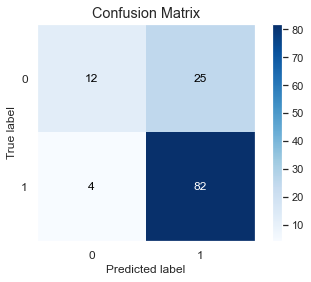

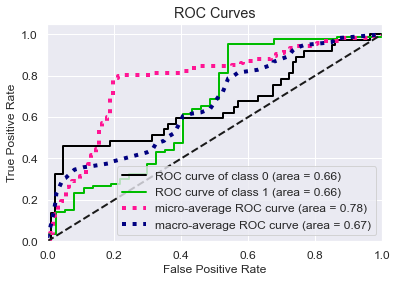

In [89]:
#Using Kfold cross validation for fitting on the training set and for predicting the test set.

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve


skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = SVC(C=0.3, class_weight=None, gamma='auto', kernel='sigmoid', probability=True)
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

SVM_y_pred = classifier.predict(X_test_scaled)
SVM_y_probs = classifier.predict_proba(X_test_scaled)

print()
skplt.metrics.plot_confusion_matrix(y_test,SVM_y_pred)
print() 
print(f'SVM Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, SVM_y_pred)*100,3)} %')
print()
print(f'SVM ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, SVM_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, SVM_y_pred))
skplt.metrics.plot_roc(y_test, SVM_y_probs);

On the test set, SVM gave an accuracy of 76.4%, with an overall AUC acore of 65%.This model has a high Recall score on the 1s, but a poor recal score on the 0s.

### Using CATBOOST

1 of kfold 10
Accuracy: 72.0 %
2 of kfold 10
Accuracy: 85.71428571428571 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 83.6734693877551 %
6 of kfold 10
Accuracy: 75.51020408163265 %
7 of kfold 10
Accuracy: 73.46938775510205 %
8 of kfold 10
Accuracy: 83.6734693877551 %
9 of kfold 10
Accuracy: 85.71428571428571 %
10 of kfold 10
Accuracy: 85.71428571428571 %

Mean Cross-Val Accuracy: 80.669 %


CATBOOST Accuracy on TEST set: 78.862 %

CATBOOST ROC AUC Score: 69.799 %

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        37
           1       0.79      0.95      0.86        86

    accuracy                           0.79       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.79      0.79      0.76       123



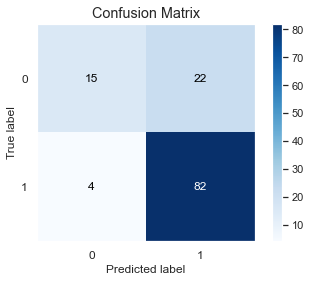

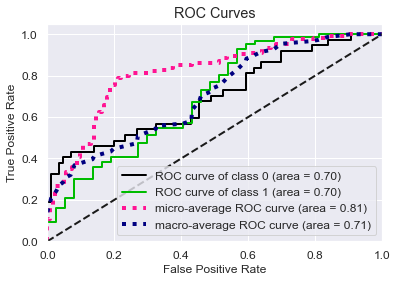

In [90]:
#CATBOOST

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = CatBoostClassifier(verbose = False)
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CATBOOST_y_pred = classifier.predict(X_test)
CATBOOST_y_probs = classifier.predict_proba(X_test)

print()
skplt.metrics.plot_confusion_matrix(y_test,CATBOOST_y_pred)
print() 
print(f'CATBOOST Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CATBOOST_y_pred)*100,3)} %')
print()
print(f'CATBOOST ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, CATBOOST_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, CATBOOST_y_pred))
skplt.metrics.plot_roc(y_test, CATBOOST_y_probs);

Compared to SVM, Catboost has a slightly better accuracy of 78.8% with a higher AUC Score of almost 70%. The recal score of 1s is the same as SVM, but catboost has a slightly higher recall score on the 0s.





**Overall, both models could perform slighly better. Hence, both models will be subjected to calibration on the next step.**

# Model Calibration

#### Calibrating SVM

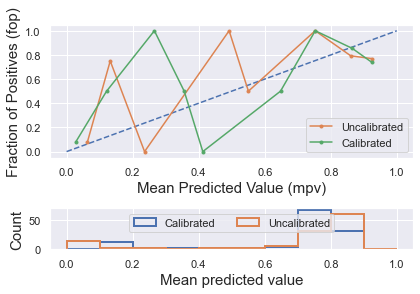

In [91]:
#Calibrating SVM

from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

#Uncalibrated model
model = SVC(C=0.3, class_weight=None, gamma='auto', kernel='sigmoid', probability=True)

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

model.fit(X_train_scaled, y_train)

uc_probs = model.predict_proba(X_test_scaled)[:, 1]
uc_fop, uc_mpv = calibration_curve(y_test, uc_probs, n_bins=10, normalize=True)

#Calibrating Model
calibrated_SVM = CalibratedClassifierCV(model, method='sigmoid', cv=skf)
calibrated_SVM.fit(X_train_scaled, y_train)
# predict probabilities
c_probs = calibrated_SVM.predict_proba(X_test_scaled)[:, 1]
# reliability diagram
c_fop, c_mpv = calibration_curve(y_test, c_probs, n_bins=10, normalize=True)


# plot perfectly calibrated

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], linestyle='--');

# plot un calibrated model reliability 
ax1.plot(uc_mpv, uc_fop, marker='.', label = 'Uncalibrated');

# plot calibrated reliability
ax1.plot(c_mpv, c_fop, marker='.', label = 'Calibrated');

ax1.set_ylabel('Fraction of Positives (fop)')
ax1.set_xlabel('Mean Predicted Value (mpv)')
ax1.legend();

ax2.hist(c_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Calibrated')
ax2.hist(uc_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Uncalibrated')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

#### Calibrating CATBOOST

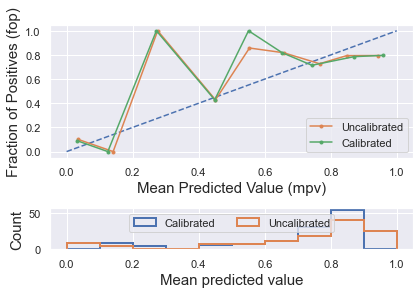

In [92]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

#Uncalibrated model
model = CatBoostClassifier(verbose = False)

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

model.fit(X_train, y_train)

uc_probs = model.predict_proba(X_test)[:, 1]
uc_fop, uc_mpv = calibration_curve(y_test, uc_probs, n_bins=10, normalize=True)

#Calibrating Model
calibrated_CATBOOST = CalibratedClassifierCV(model, method='sigmoid', cv=10)
calibrated_CATBOOST.fit(X_train, y_train)
# predict probabilities
c_probs = calibrated_CATBOOST.predict_proba(X_test)[:, 1]
# reliability diagram
c_fop, c_mpv = calibration_curve(y_test, c_probs, n_bins=10, normalize=True)


# plot CATBOOST calibrated

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], linestyle='--');

# plot un calibrated model reliability 
ax1.plot(uc_mpv, uc_fop, marker='.', label = 'Uncalibrated');

# plot calibrated reliability
ax1.plot(c_mpv, c_fop, marker='.', label = 'Calibrated');

ax1.set_ylabel('Fraction of Positives (fop)')
ax1.set_xlabel('Mean Predicted Value (mpv)')
ax1.legend();

ax2.hist(c_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Calibrated')
ax2.hist(uc_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Uncalibrated')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

### Testing again on X_test after calibration

1 of kfold 10
Accuracy: 78.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 85.71428571428571 %
6 of kfold 10
Accuracy: 75.51020408163265 %
7 of kfold 10
Accuracy: 79.59183673469387 %
8 of kfold 10
Accuracy: 79.59183673469387 %
9 of kfold 10
Accuracy: 87.75510204081633 %
10 of kfold 10
Accuracy: 83.6734693877551 %

Mean Cross-Val Accuracy: 81.882 %


CAL_SVM Accuracy Accuracy on TEST set: 78.862 %

CAL_SVM ROC AUC Score: 66.31 %

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        37
           1       0.79      0.95      0.86        86

    accuracy                           0.79       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.79      0.79      0.76       123



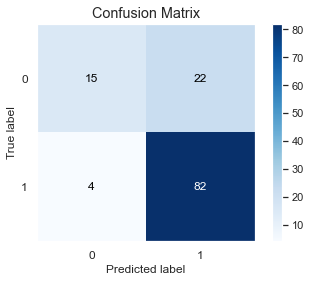

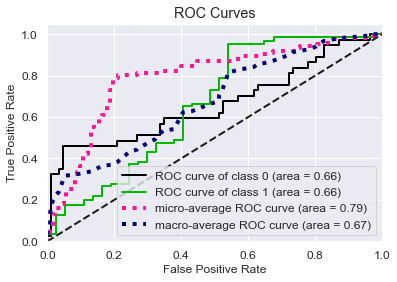

In [93]:
# Calibrated SVM

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = calibrated_SVM
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CAL_SVM_y_pred = classifier.predict(X_test_scaled)
CAL_SVM_y_probs = classifier.predict_proba(X_test_scaled)

CAL_SVM_y_allprobs = classifier.predict_proba(X_test_scaled)

print()
skplt.metrics.plot_confusion_matrix(y_test,CAL_SVM_y_pred)
print() 
print(f'CAL_SVM Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CAL_SVM_y_pred)*100,3)} %')
print()
print(f'CAL_SVM ROC AUC Score: {np.round(metrics.roc_auc_score(y_test, CAL_SVM_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, CAL_SVM_y_pred))
skplt.metrics.plot_roc(y_test, CAL_SVM_y_probs);

**After calibrating SVM, it gave a higher accuracy score of 78.8%**

1 of kfold 10
Accuracy: 72.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 85.71428571428571 %
6 of kfold 10
Accuracy: 75.51020408163265 %
7 of kfold 10
Accuracy: 71.42857142857143 %
8 of kfold 10
Accuracy: 79.59183673469387 %
9 of kfold 10
Accuracy: 85.71428571428571 %
10 of kfold 10
Accuracy: 85.71428571428571 %

Mean Cross-Val Accuracy: 80.465 %


CAL_CATBOOST Accuracy Accuracy on TEST set: 78.862 %

CAL_CATBOOST ROC AUC Score: 70.27 %

              precision    recall  f1-score   support

           0       0.87      0.35      0.50        37
           1       0.78      0.98      0.87        86

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.79      0.76       123



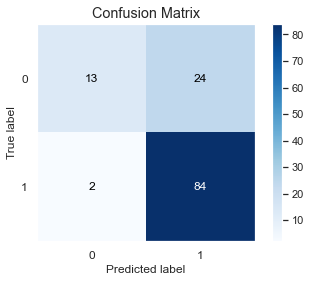

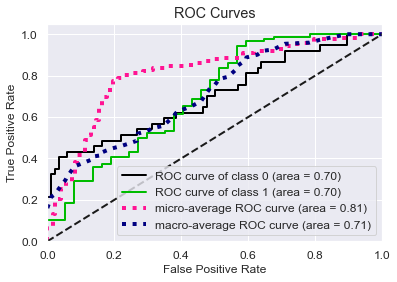

In [96]:
#usin Calibrated CATBOOST

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = calibrated_CATBOOST
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CAL_CATBOOST_y_pred = classifier.predict(X_test)
CAL_CATBOOST_y_probs = classifier.predict_proba(X_test)

print()
skplt.metrics.plot_confusion_matrix(y_test,CAL_CATBOOST_y_pred)
print() 
print(f'CAL_CATBOOST Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CAL_CATBOOST_y_pred)*100,3)} %')
print()
print(f'CAL_CATBOOST ROC AUC Score: {np.round(metrics.roc_auc_score(y_test,CAL_CATBOOST_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, CAL_CATBOOST_y_pred))
skplt.metrics.plot_roc(y_test, CAL_CATBOOST_y_probs);

### Feature Importance

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
idx = ['Female','Male','Rural','Semiurban','Urban', 'Married', 'Dependents', 
       'Education','Self_Employed', 'Credit_History','Total_Income_log', 'EMI_log', 'Balance_income_log']

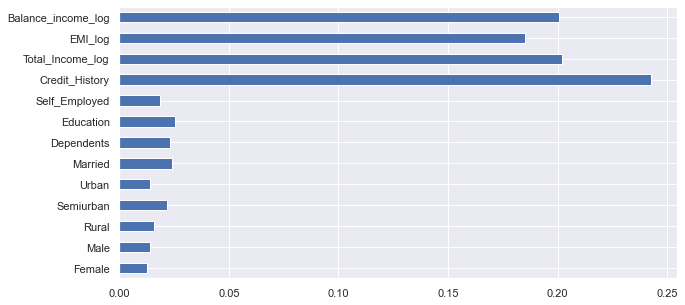

In [102]:
imp_features = pd.Series(model.feature_importances_, index = idx)
imp_features.plot(kind = 'barh', figsize = (10,5));

,Features,Score
9,Credit_History,0.660137
3,Semiurban,0.079027
5,Married,0.077183
7,Education,0.045528
12,Balance_income_log,0.009351
0,Female,-0.000000
1,Male,0.000000
4,Urban,-0.000000
6,Dependents,0.000000
8,Self_Employed,0.000000


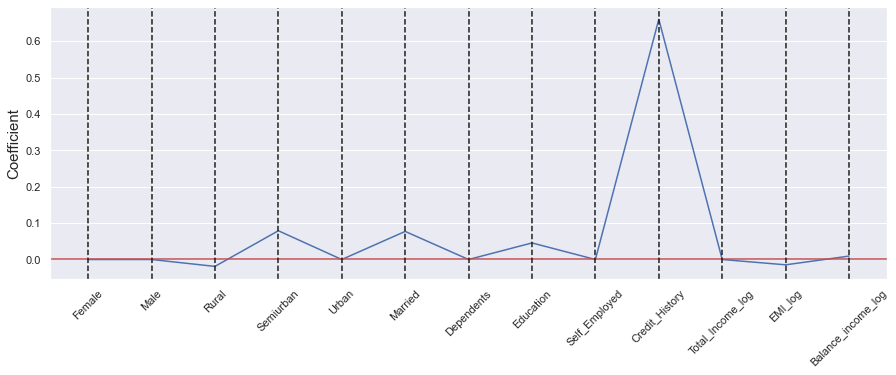

In [179]:
from sklearn.linear_model import Lasso
names = idx

lasso = Lasso(alpha = 0.005)
lasso_coef = lasso.fit(X_train,y_train).coef_

plt.figure(figsize = (15,5))
plt.plot(range(len(names)), lasso_coef);
plt.axhline(y=0, color='r', linestyle='-')

for xc in range(len(names)):
    plt.axvline(x=xc, color='k', linestyle='--')

plt.xticks(range(len(names)), names, rotation = 45)
plt.ylabel('Coefficient');

pd.DataFrame({'Features':idx, 'Score':lasso_coef}).sort_values('Score', ascending = False)

,Features,Score
9,Credit_History,0.660137
3,Semiurban,0.079027
5,Married,0.077183
7,Education,0.045528
12,Balance_income_log,0.009351
0,Female,-0.000000
1,Male,0.000000
4,Urban,-0.000000
6,Dependents,0.000000
8,Self_Employed,0.000000


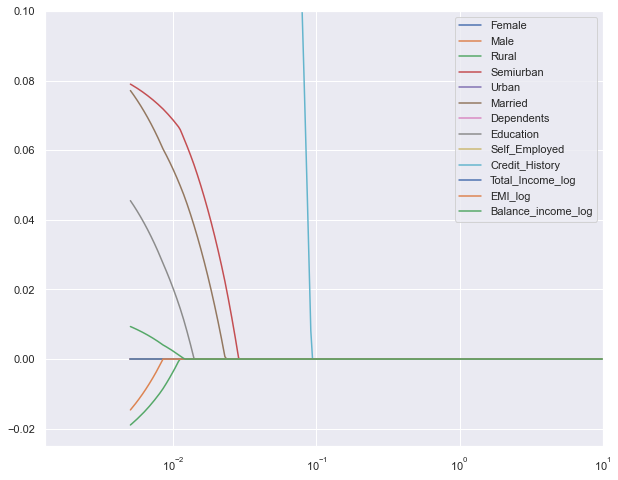

In [206]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,1000)*0.5

# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize = (10,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.legend(idx);
ax.set_ylim(-0.025,0.1)
ax.set_xlim(0,10);

pd.DataFrame({'Features':idx, 'Score':coefs[-1]}).sort_values('Score', ascending = False)

In [213]:
from sklearn.linear_model import LassoCV

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

lasso_cv_model = LassoCV(alphas = 10**np.linspace(10,-2,1000)*0.5, 
                         cv = skf, max_iter = 100000).fit(X_train,y_train)

print(f'alpha: {lasso_cv_model.alpha_}')
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

pd.DataFrame({'Features': idx, 'Score':lasso_tuned.coef_, }).sort_values('Score', ascending = False)

alpha: 0.006778008926646831


,Features,Score
9,Credit_History,0.648193
3,Semiurban,0.075341
5,Married,0.068535
7,Education,0.036250
12,Balance_income_log,0.006624
0,Female,-0.000000
1,Male,0.000000
4,Urban,-0.000000
6,Dependents,0.000000
8,Self_Employed,0.000000


,Column,Feature Imp
9,Credit_History,22.858718
3,Semiurban,6.954898
2,Rural,3.774153
5,Married,2.220627
7,Education,1.335123
4,Urban,0.981581
0,Female,0.438711
6,Dependents,0.365051
1,Male,0.097127
12,Balance_income_log,0.053234


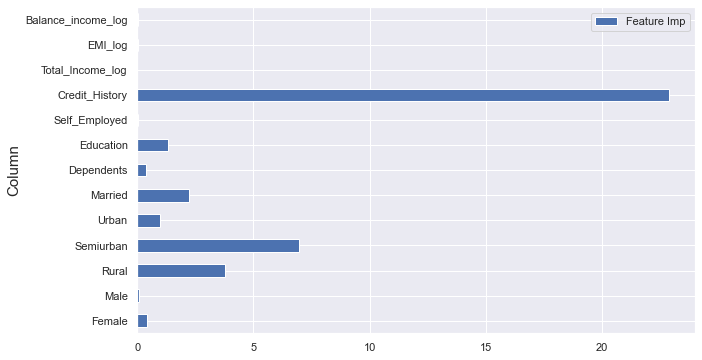

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sel = SelectKBest(chi2, k = 8)
sel.fit_transform(X_train,y_train)

fi_df = pd.DataFrame({'Column':idx, 'Feature Imp':sel.scores_})
fi_df.plot(x = 'Column', y ='Feature Imp', kind = 'barh', figsize = (10,6));

fi_df.sort_values('Feature Imp', ascending = False).style.highlight_max(color = 'green', axis = 0)

,Features,Score
9,Credit_History,0.696144
3,Semiurban,0.133021
1,Male,0.101143
5,Married,0.093238
0,Female,0.083397
7,Education,0.078369
4,Urban,0.043096
8,Self_Employed,0.033656
12,Balance_income_log,0.030540
6,Dependents,0.014845


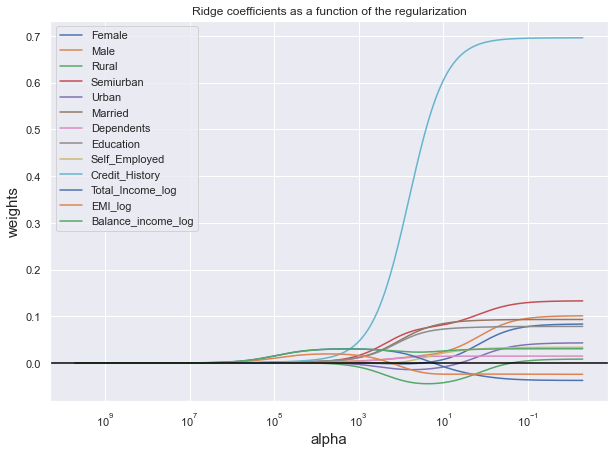

In [232]:
#Using regularization traceplots

from sklearn import linear_model

# #############################################################################
# Compute paths

n_alphas = 500
alphas = 10**np.linspace(10,-2,1000)*0.5#np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
label = idx

plt.figure(figsize = (10,7))
ax = plt.gca()
ax.plot(alphas, coefs);
plt.axhline(y=0, color='black', linestyle='-')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(label);

pd.DataFrame({'Features':idx, 'Score':coefs[-1]}).sort_values('Score', ascending = False)

In [233]:
pd.DataFrame({'Features':idx, 'Score':coefs[-1]}).sort_values('Score', ascending = False).index

Int64Index([9, 3, 1, 5, 0, 7, 4, 8, 12, 6, 2, 11, 10], dtype='int64')

In [158]:
#BAckward Elimination

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

skf = StratifiedKFold(n_splits=3, random_state=745, shuffle = True)

back = SFS(RandomForestClassifier(), k_features=(3,10),forward=False, floating=False, cv=skf)

back.fit(X_train, y_train)

back.k_feature_names_

('2', '3', '4', '5', '6', '7', '9', '10', '11')

In [160]:
#Forward Elimination

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

skf = StratifiedKFold(n_splits=3, random_state=745, shuffle = True)

front = SFS(RandomForestClassifier(), k_features=(3,10),
          forward=True, floating=False, cv=skf)

front.fit(X_train, y_train)

front.k_feature_names_

('0', '1', '9')

In [163]:
#Bidirectional Elimination

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

skf = StratifiedKFold(n_splits=3, random_state=745, shuffle = True)

bi = SFS(RandomForestClassifier(), k_features=(3,10),
          forward=True, floating=True, cv=skf)

bi.fit(X_train, y_train)

bi.k_feature_names_

('0', '1', '9')

From all the above feature selection techniques, the most important feature is the credit history variable, followed by the property they own.

In [255]:
#chosen_cols = sorted((9, 3, 1, 5, 0, 7, 4, 8, 12, 6))
chosen_cols = [int(x) for x in back.k_feature_names_]
print(chosen_cols)

X_train_pars = X_train[:,chosen_cols]
X_test_pars = X_test[:,chosen_cols]

[2, 3, 4, 5, 6, 7, 9, 10, 11]


In [257]:
X_train_pars_scaled = X_train_pars.copy()
X_test_pars_scaled = X_test_pars.copy()

sc = StandardScaler()

X_train_pars_scaled[:,-2:] = sc.fit_transform(X_train_pars_scaled[:,-2:])
X_test_pars_scaled[:,-2:] = sc.transform(X_test_pars_scaled[:,-2:])

X_train_pars and X_test_pars dont need to be scaled.

In [258]:
#Cross-Validation using classic classification models.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    LogisticRegression(),
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB()
]

model_names = ('Logistic', 'Linear_SVC', 'Kernal_SVC', 'KNN', 'Naive_Bayes')

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=5, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(models, model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train_pars_scaled,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train_pars_scaled[train_index], X_train_pars_scaled[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
    highlight_max(color = 'green', axis = 0)

Logistic

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 80.61224489795919 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 80.61224489795919 %
5 of kfold 5
Accuracy: 84.6938775510204 %

Mean Accuracy of Logistic: 81.262 %

Linear_SVC

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 80.61224489795919 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 80.61224489795919 %
5 of kfold 5
Accuracy: 84.6938775510204 %

Mean Accuracy of Linear_SVC: 81.262 %

Kernal_SVC

1 of kfold 5
Accuracy: 81.81818181818183 %
2 of kfold 5
Accuracy: 79.59183673469387 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 77.55102040816327 %
5 of kfold 5
Accuracy: 83.6734693877551 %

Mean Accuracy of Kernal_SVC: 80.241 %

KNN

1 of kfold 5
Accuracy: 77.77777777777779 %
2 of kfold 5
Accuracy: 74.48979591836735 %
3 of kfold 5
Accuracy: 74.48979591836735 %
4 of kfold 5
Accuracy: 73.46938775510205 %
5 of kfold 5
Accuracy: 75.510

,Models,Accuracy %,Accuracy STD%
0,Logistic,81.262000,2.009000
1,Linear_SVC,81.262000,2.009000
4,Naive_Bayes,80.649000,1.957000
2,Kernal_SVC,80.241000,2.223000
3,KNN,75.147000,1.465000


In [248]:
#Using Ensemble Models
#For these models, standardization are not needed.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree_model_names = ['Decision_tree', 'Random_forest', 'XGBOOST', 'CATBOOST', 'LightGB', 'AdaBOOST', 
                    'Gradient_Boosting_Classifier']

tree_models = [
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators = 100, criterion = 'entropy'), 
    XGBClassifier(use_label_encoder=False, eval_metric = 'error'), 
    CatBoostClassifier(verbose = False), 
    LGBMClassifier(), 
    AdaBoostClassifier(), 
    GradientBoostingClassifier()
]

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=5, random_state=157, shuffle = True)

final_score = []
final_score_std = []

for model,name in zip(tree_models,tree_model_names):
    print(name)
    print()
    score = [] 
    fold_no = 1 
    for train_index, test_index in skf.split(X_train_pars,y_train): 
        print(f'{fold_no} of kfold {skf.n_splits}') 
        X_train_kfold, X_val_kfold = X_train_pars[train_index], X_train_pars[test_index] 
        y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index] 
        classifier = model 
        classifier.fit(X_train_kfold, y_train_kfold) 
        y_pred = classifier.predict(X_val_kfold)
        print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
        score.append(accuracy_score(y_val_kfold, y_pred))
        fold_no += 1
    print()
    print(f'Mean Accuracy of {name}: {np.round(np.mean(score)*100,3)} %')
    print()
    final_score.append(np.round(np.mean(score)*100,3))
    final_score_std.append(np.round(np.std(score)*100,3))

pd.DataFrame({'Models':tree_model_names, 
              'Accuracy %': final_score, 
             'Accuracy STD%': final_score_std}).sort_values('Accuracy %', ascending = False).style. \
highlight_max(color = 'green', axis = 0)

Decision_tree

1 of kfold 5
Accuracy: 70.70707070707071 %
2 of kfold 5
Accuracy: 78.57142857142857 %
3 of kfold 5
Accuracy: 69.38775510204081 %
4 of kfold 5
Accuracy: 71.42857142857143 %
5 of kfold 5
Accuracy: 72.44897959183673 %

Mean Accuracy of Decision_tree: 72.509 %

Random_forest

1 of kfold 5
Accuracy: 76.76767676767676 %
2 of kfold 5
Accuracy: 79.59183673469387 %
3 of kfold 5
Accuracy: 78.57142857142857 %
4 of kfold 5
Accuracy: 80.61224489795919 %
5 of kfold 5
Accuracy: 79.59183673469387 %

Mean Accuracy of Random_forest: 79.027 %

XGBOOST

1 of kfold 5
Accuracy: 73.73737373737373 %
2 of kfold 5
Accuracy: 78.57142857142857 %
3 of kfold 5
Accuracy: 74.48979591836735 %
4 of kfold 5
Accuracy: 75.51020408163265 %
5 of kfold 5
Accuracy: 80.61224489795919 %

Mean Accuracy of XGBOOST: 76.584 %

CATBOOST

1 of kfold 5
Accuracy: 79.7979797979798 %
2 of kfold 5
Accuracy: 81.63265306122449 %
3 of kfold 5
Accuracy: 80.61224489795919 %
4 of kfold 5
Accuracy: 79.59183673469387 %
5 of kfold 5

,Models,Accuracy %,Accuracy STD%
3,CATBOOST,81.470000,2.241000
1,Random_forest,79.027000,1.301000
6,Gradient_Boosting_Classifier,78.815000,2.940000
5,AdaBOOST,78.209000,1.205000
4,LightGB,76.780000,1.999000
2,XGBOOST,76.584000,2.601000
0,Decision_tree,72.509000,3.191000


SVM, Logistic and CATBOOST are the chosen algorithms.

#### Tuning and Testing SVM

In [270]:
#KERNAL SVC

#Using Randomized search first, to narrow the parameter settings.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'C': np.arange(0.05,1.05,0.05), 'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 
          'probability': [True], 'class_weight': [None, 'balanced']}, 
          {'C': np.arange(0.05,1.05,0.05), 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'], 
           'coef0': [0.0, 0.01, 0.1, 0.2], 'probability': [True], 'class_weight': [None, 'balanced']},
          {'C': np.arange(0.05,1.05,0.05), 'kernel': ['linear'], 'probability': [True], 
          'class_weight': [None, 'balanced']}]


tuning = 1

while tuning <=5:
    skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

    grid_search = RandomizedSearchCV(estimator = SVC(), 
                           param_distributions = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

    grid_search.fit(X_train_pars_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning += 1

tuning: 1
Best Accuracy: 81.47755102040814 %
Best Parameters: {'probability': True, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.1, 'class_weight': 'balanced', 'C': 0.25}

tuning: 2
Best Accuracy: 81.2734693877551 %
Best Parameters: {'probability': True, 'kernel': 'linear', 'class_weight': 'balanced', 'C': 0.55}

tuning: 3
Best Accuracy: 80.66122448979591 %
Best Parameters: {'probability': True, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 0.6000000000000001}

tuning: 4
Best Accuracy: 81.2734693877551 %
Best Parameters: {'probability': True, 'kernel': 'linear', 'class_weight': None, 'C': 0.5}

tuning: 5
Best Accuracy: 81.2734693877551 %
Best Parameters: {'probability': True, 'kernel': 'linear', 'class_weight': 'balanced', 'C': 0.9500000000000001}



In [281]:
#KERNAL SVC

#Using Randomized search first, to narrow the parameter settings.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = [{'C': np.arange(0.05,1.05,0.05), 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'], 
           'coef0': [0.0, 0.01, 0.1, 0.2], 'probability': [True], 'class_weight': [None, 'balanced']}]


tuning = 1

while tuning <=3:
    skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

    grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

    grid_search.fit(X_train_pars_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning += 1

tuning: 1
Best Accuracy: 81.6734693877551 %
Best Parameters: {'C': 0.25, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}

tuning: 2
Best Accuracy: 81.6734693877551 %
Best Parameters: {'C': 0.25, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}

tuning: 3
Best Accuracy: 81.6734693877551 %
Best Parameters: {'C': 0.25, 'class_weight': None, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}



1 of kfold 10
Accuracy: 80.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 75.51020408163265 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 85.71428571428571 %
6 of kfold 10
Accuracy: 77.55102040816327 %
7 of kfold 10
Accuracy: 79.59183673469387 %
8 of kfold 10
Accuracy: 79.59183673469387 %
9 of kfold 10
Accuracy: 83.6734693877551 %
10 of kfold 10
Accuracy: 83.6734693877551 %

Mean Cross-Val Accuracy: 81.673 %


SVM Accuracy Accuracy on TEST set: 78.862 %

SVM ROC AUC Score: 68.762 %

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        37
           1       0.79      0.95      0.86        86

    accuracy                           0.79       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.79      0.79      0.76       123



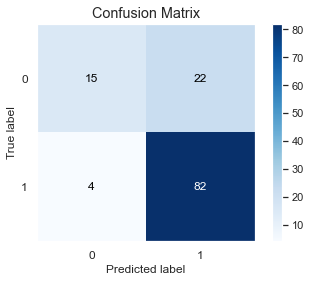

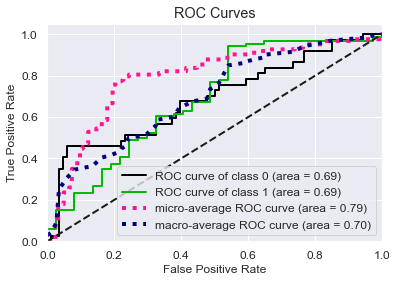

In [282]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_pars_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_pars_scaled[train_index], X_train_pars_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = SVC(C=0.25, class_weight=None, kernel='sigmoid', probability=True, gamma = 'auto')
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

SVM_y_pred = classifier.predict(X_test_pars_scaled)
SVM_y_probs = classifier.predict_proba(X_test_pars_scaled)

print()
skplt.metrics.plot_confusion_matrix(y_test,SVM_y_pred)
print() 
print(f'SVM Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, SVM_y_pred)*100,3)} %')
print()
print(f'SVM ROC AUC Score: {np.round(metrics.roc_auc_score(y_test,SVM_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, SVM_y_pred))
skplt.metrics.plot_roc(y_test, SVM_y_probs);

#### Tuning and Testing Logistic Regression

In [277]:
#Logistic Regression #2

# For Logistic Regression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

params = [{'C': np.arange(0.1,1.1,0.1), 'class_weight': [None, 'balanced'], 
           'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
           'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
         {'C': np.arange(0.1,1.1,0.1), 'class_weight': [None, 'balanced'], 
           'penalty': ['l1', 'l2', 'elasticnet'], 
           'solver': ['liblinear']}]


tuning = 1
while tuning <=5:
    skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

    grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = params, cv = skf, 
                           scoring = 'accuracy', n_jobs = -1) #To use all processors

    grid_search.fit(X_train_pars_scaled, y_train)
    best_accuracy = grid_search.best_score_
    best_param = grid_search.best_params_
    print(f'tuning: {tuning}')
    print('Logistic Regression Params:')
    print(f'Best Accuracy: {best_accuracy*100} %')
    print(f'Best Parameters: {best_param}')
    print()
    tuning +=1

tuning: 1
Logistic Regression Params:
Best Accuracy: 81.47755102040817 %
Best Parameters: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

tuning: 2
Logistic Regression Params:
Best Accuracy: 81.47755102040817 %
Best Parameters: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

tuning: 3
Logistic Regression Params:
Best Accuracy: 81.47755102040817 %
Best Parameters: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

tuning: 4
Logistic Regression Params:
Best Accuracy: 81.47755102040817 %
Best Parameters: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

tuning: 5
Logistic Regression Params:
Best Accuracy: 81.47755102040817 %
Best Parameters: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}



1 of kfold 10
Accuracy: 76.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 83.6734693877551 %
6 of kfold 10
Accuracy: 79.59183673469387 %
7 of kfold 10
Accuracy: 79.59183673469387 %
8 of kfold 10
Accuracy: 77.55102040816327 %
9 of kfold 10
Accuracy: 85.71428571428571 %
10 of kfold 10
Accuracy: 83.6734693877551 %

Mean Cross-Val Accuracy: 81.478 %


Logistic Accuracy Accuracy on TEST set: 79.675 %

Logistic ROC AUC Score: 74.01 %

              precision    recall  f1-score   support

           0       0.93      0.35      0.51        37
           1       0.78      0.99      0.87        86

    accuracy                           0.80       123
   macro avg       0.85      0.67      0.69       123
weighted avg       0.82      0.80      0.76       123



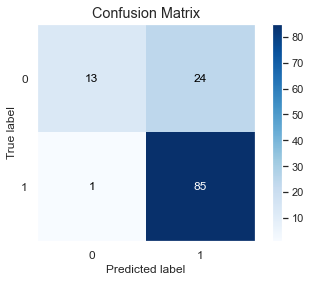

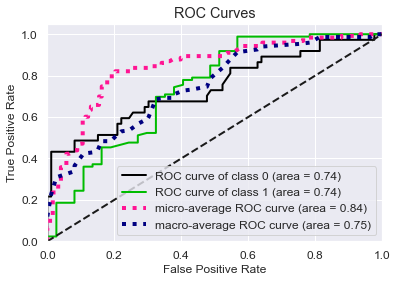

In [279]:
#usin Calibrated CATBOOST

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_pars_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_pars_scaled[train_index], X_train_pars_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = LogisticRegression(C=0.2, class_weight='balanced', penalty='l1', solver='liblinear')
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

Logistic_y_pred = classifier.predict(X_test_pars_scaled)
Logistic_y_probs = classifier.predict_proba(X_test_pars_scaled)

print()
skplt.metrics.plot_confusion_matrix(y_test,Logistic_y_pred)
print() 
print(f'Logistic Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, Logistic_y_pred)*100,3)} %')
print()
print(f'Logistic ROC AUC Score: {np.round(metrics.roc_auc_score(y_test,Logistic_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, Logistic_y_pred))
skplt.metrics.plot_roc(y_test, Logistic_y_probs);

#### Using CATBOOST

1 of kfold 10
Accuracy: 76.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 85.71428571428571 %
6 of kfold 10
Accuracy: 77.55102040816327 %
7 of kfold 10
Accuracy: 77.55102040816327 %
8 of kfold 10
Accuracy: 77.55102040816327 %
9 of kfold 10
Accuracy: 83.6734693877551 %
10 of kfold 10
Accuracy: 81.63265306122449 %

Mean Cross-Val Accuracy: 80.865 %


CAL_CATBOOST Accuracy Accuracy on TEST set: 75.61 %

CAL_CATBOOST ROC AUC Score: 71.119 %

              precision    recall  f1-score   support

           0       0.68      0.35      0.46        37
           1       0.77      0.93      0.84        86

    accuracy                           0.76       123
   macro avg       0.73      0.64      0.65       123
weighted avg       0.74      0.76      0.73       123



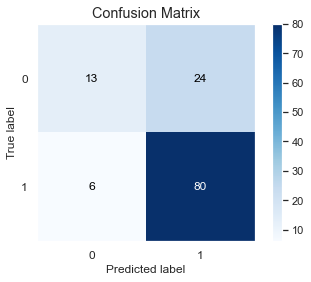

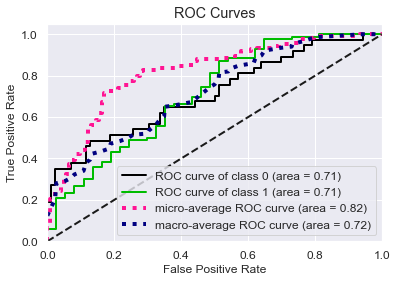

In [280]:
#usin Calibrated CATBOOST

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_pars,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_pars[train_index], X_train_pars[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = CatBoostClassifier(verbose = False)
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

CAL_CATBOOST_y_pred = classifier.predict(X_test_pars)
CAL_CATBOOST_y_probs = classifier.predict_proba(X_test_pars)

print()
skplt.metrics.plot_confusion_matrix(y_test,CAL_CATBOOST_y_pred)
print() 
print(f'CAL_CATBOOST Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, CAL_CATBOOST_y_pred)*100,3)} %')
print()
print(f'CAL_CATBOOST ROC AUC Score: {np.round(metrics.roc_auc_score(y_test,CAL_CATBOOST_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, CAL_CATBOOST_y_pred))
skplt.metrics.plot_roc(y_test, CAL_CATBOOST_y_probs);

Logistic Regression overall shows a better accuracy of around 79% with a much better recall score of 99% on 1s. All the models didn't perform well in terms of recall score on 0s.

## Calibrating Logistic

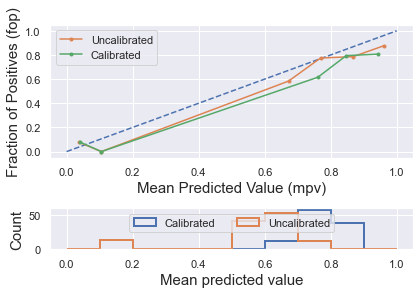

In [293]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

#Uncalibrated model
model = LogisticRegression(C=0.2, class_weight='balanced', penalty='l1', solver='liblinear')

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

model.fit(X_train_pars_scaled, y_train)

uc_probs = model.predict_proba(X_test_pars_scaled)[:, 1]
uc_fop, uc_mpv = calibration_curve(y_test, uc_probs, n_bins=10, normalize=True)

#Calibrating Model
calibrated_Logistic = CalibratedClassifierCV(model, method='sigmoid', cv=skf)
calibrated_Logistic.fit(X_train_pars_scaled, y_train)
# predict probabilities
c_probs = calibrated_Logistic.predict_proba(X_test_pars_scaled)[:, 1]
# reliability diagram
c_fop, c_mpv = calibration_curve(y_test, c_probs, n_bins=10, normalize=True)


# plot Logistic calibrated

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], linestyle='--');

# plot un calibrated model reliability 
ax1.plot(uc_mpv, uc_fop, marker='.', label = 'Uncalibrated');

# plot calibrated reliability
ax1.plot(c_mpv, c_fop, marker='.', label = 'Calibrated');

ax1.set_ylabel('Fraction of Positives (fop)')
ax1.set_xlabel('Mean Predicted Value (mpv)')
ax1.legend();

ax2.hist(c_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Calibrated')
ax2.hist(uc_probs, range=(0, 1), bins=10, histtype="step", lw=2, label = 'Uncalibrated')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

1 of kfold 10
Accuracy: 76.0 %
2 of kfold 10
Accuracy: 87.75510204081633 %
3 of kfold 10
Accuracy: 77.55102040816327 %
4 of kfold 10
Accuracy: 83.6734693877551 %
5 of kfold 10
Accuracy: 83.6734693877551 %
6 of kfold 10
Accuracy: 77.55102040816327 %
7 of kfold 10
Accuracy: 79.59183673469387 %
8 of kfold 10
Accuracy: 77.55102040816327 %
9 of kfold 10
Accuracy: 85.71428571428571 %
10 of kfold 10
Accuracy: 83.6734693877551 %

Mean Cross-Val Accuracy: 81.273 %


Cal_Logistic Accuracy Accuracy on TEST set: 79.675 %

Cal_Logistic ROC AUC Score: 73.853 %

              precision    recall  f1-score   support

           0       0.93      0.35      0.51        37
           1       0.78      0.99      0.87        86

    accuracy                           0.80       123
   macro avg       0.85      0.67      0.69       123
weighted avg       0.82      0.80      0.76       123



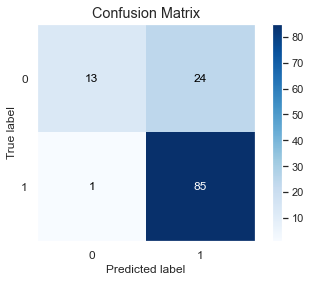

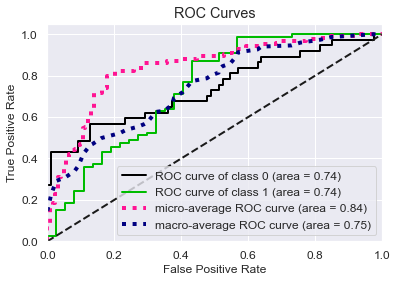

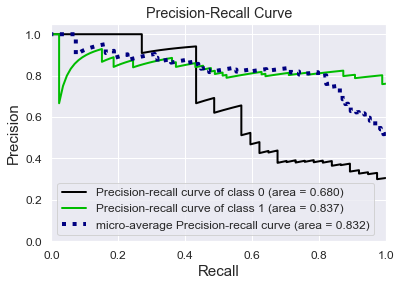

In [296]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_train_pars_scaled,y_train):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_train_pars_scaled[train_index], X_train_pars_scaled[test_index]
    y_train_kfold, y_val_kfold = y_train[train_index], y_train[test_index]
    
    classifier = calibrated_Logistic
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

Cal_Logistic_y_pred = classifier.predict(X_test_pars_scaled)
Cal_Logistic_y_probs = classifier.predict_proba(X_test_pars_scaled)

print()
skplt.metrics.plot_confusion_matrix(y_test,Cal_Logistic_y_pred);
print() 
print(f'Cal_Logistic Accuracy Accuracy on TEST set: {np.round(metrics.accuracy_score(y_test, Cal_Logistic_y_pred)*100,3)} %')
print()
print(f'Cal_Logistic ROC AUC Score: {np.round(metrics.roc_auc_score(y_test,Cal_Logistic_y_probs[:,1])*100,3)} %')
print()
print(metrics.classification_report(y_test, Cal_Logistic_y_pred))
skplt.metrics.plot_roc(y_test, Cal_Logistic_y_probs);
skplt.metrics.plot_precision_recall_curve(y_test, Cal_Logistic_y_probs);

### Preprocessing TEST set

In [312]:
X_pars = X[:,chosen_cols]
X_pars_scaled = X_pars.copy()

In [313]:
sc = StandardScaler()
X_pars_scaled[:,-2:] = sc.fit_transform(X_pars_scaled[:,-2:])

In [314]:
test_df_pars = test_df[:,chosen_cols]

In [315]:
test_df_pars_scaled = test_df_pars.copy()

In [316]:
test_df_pars_scaled[:,-2:] = sc.transform(test_df_pars_scaled[:,-2:])

In [319]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [320]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

skf = StratifiedKFold(n_splits=10, random_state=157, shuffle = True)

score = []
fold_no = 1

for train_index, test_index in skf.split(X_pars_scaled,y):
    print(f'{fold_no} of kfold {skf.n_splits}')
    X_train_kfold, X_val_kfold = X_pars_scaled[train_index], X_pars_scaled[test_index]
    y_train_kfold, y_val_kfold = y[train_index], y[test_index]
    
    classifier = calibrated_Logistic
    
    classifier.fit(X_train_kfold, y_train_kfold) 
    y_pred = classifier.predict(X_val_kfold)
    print(f'Accuracy: {accuracy_score(y_val_kfold, y_pred)*100} %')
    score.append(accuracy_score(y_val_kfold, y_pred))
    fold_no += 1
print()
print(f'Mean Cross-Val Accuracy: {np.round(np.mean(score)*100,3)} %')
    

Cal_Logistic_y_pred = classifier.predict(test_df_pars_scaled)

submission['Loan_Status'] = Cal_Logistic_y_pred
submission['Loan_ID'] = test['Loan_ID']

submission['Loan_Status'] = np.where(submission['Loan_Status'] == 0, 'N', 'Y')
submission.to_csv('Logistic.csv', index = False)

1 of kfold 10
Accuracy: 77.41935483870968 %
2 of kfold 10
Accuracy: 85.48387096774194 %
3 of kfold 10
Accuracy: 77.41935483870968 %
4 of kfold 10
Accuracy: 79.03225806451613 %
5 of kfold 10
Accuracy: 83.60655737704919 %
6 of kfold 10
Accuracy: 85.24590163934425 %
7 of kfold 10
Accuracy: 90.1639344262295 %
8 of kfold 10
Accuracy: 77.04918032786885 %
9 of kfold 10
Accuracy: 75.40983606557377 %
10 of kfold 10
Accuracy: 78.68852459016394 %

Mean Cross-Val Accuracy: 80.952 %


**Score on Test set = 77.78%**